In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
from utilities.config import BOSTON_NAMES

loading in the Boston data set from sklearn

In [3]:
Boston = load_boston()

The number of rows and columns in this data set along with what the rows and columns represent

In [4]:
print(Boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
target = pd.Series(Boston.target, name='MEDV')

In [6]:
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

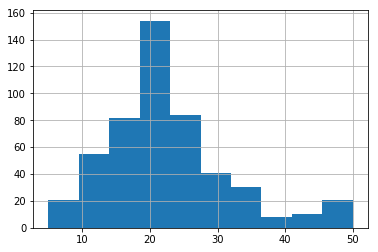

In [7]:
target.hist()

In [8]:
df = pd.DataFrame(data=Boston.data, columns=Boston.feature_names)

In [9]:
df = pd.concat([df, target], axis=1)

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


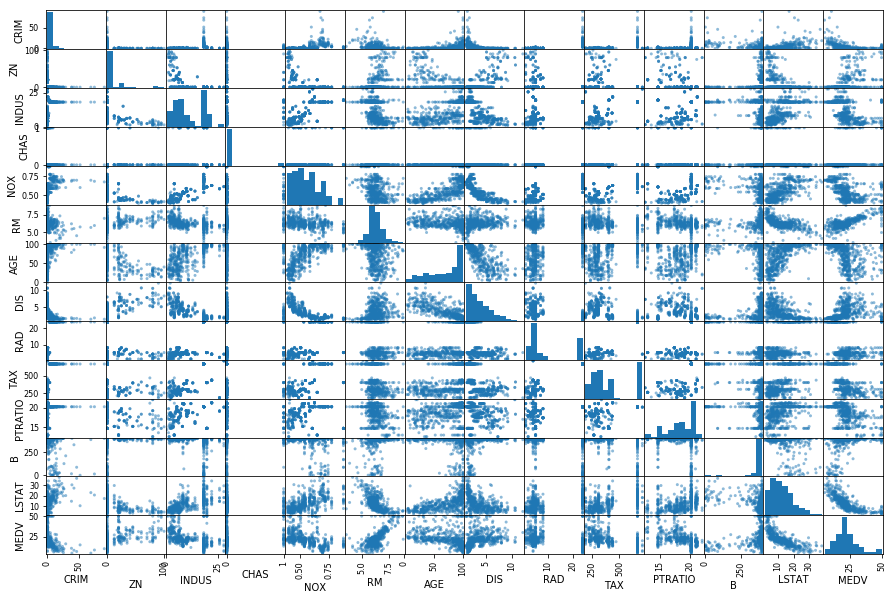

In [11]:
pd.plotting.scatter_matrix(df, figsize=(15,10))
plt.show()

In [12]:
df.columns = [BOSTON_NAMES[col] for col in df.columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   crime_rate                         506 non-null    float64
 1   residential_land_over_25000_sq_ft  506 non-null    float64
 2   non_retail_business                506 non-null    float64
 3   suburbs_close_to_charles_river     506 non-null    float64
 4   nitric_oxides_concentration        506 non-null    float64
 5   avg_number_of_rooms                506 non-null    float64
 6   owner_occupied_units_1940          506 non-null    float64
 7   distances_to_employment_centres    506 non-null    float64
 8   accessibility_to_highways          506 non-null    float64
 9   property_tax_rate                  506 non-null    float64
 10  pupil_teacher_ratio                506 non-null    float64
 11  black_ethnicity                    506 non-null    float64

pairwise scatterplots of the predictors (columns) in this data set

predictors associated with per capita crime rate

crime per capita and nitric oxides concentration


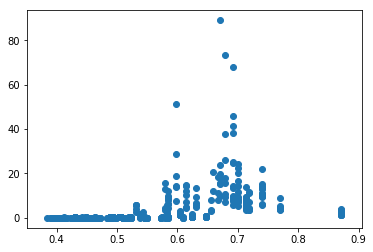

In [14]:
print('crime per capita and nitric oxides concentration')
plt.scatter(df.nitric_oxides_concentration, df.crime_rate)
plt.show()

crime per capita and average number of rooms per dwelling


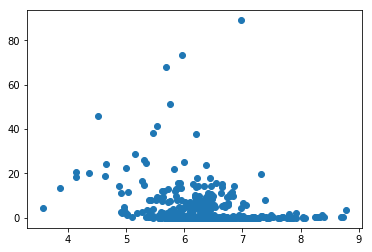

In [15]:
print('crime per capita and average number of rooms per dwelling')
plt.scatter(df.avg_number_of_rooms, df.crime_rate)
plt.show()

crime per capita and proportion of owner-occupied units built prior to 1940


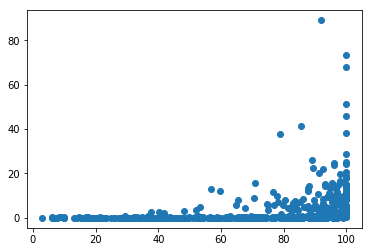

In [16]:
print('crime per capita and proportion of owner-occupied units built prior to 1940')
plt.scatter(df.owner_occupied_units_1940, df.crime_rate)
plt.show()

crime per capita and weighted and distances to five Boston employment centres


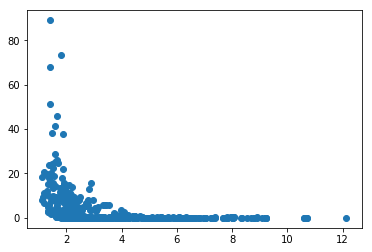

In [17]:
print('crime per capita and weighted and distances to five Boston employment centres')
plt.scatter(df.distances_to_employment_centres, df.crime_rate)
plt.show()

crime per capita and proportion of blacks by town


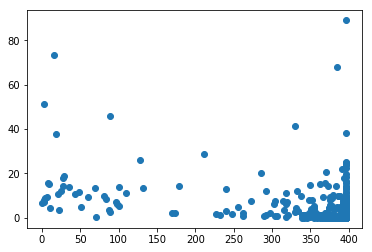

In [18]:
print('crime per capita and proportion of blacks by town')
plt.scatter(df.black_ethnicity, df.crime_rate)
plt.show()

crime per capita and % lower status of the population


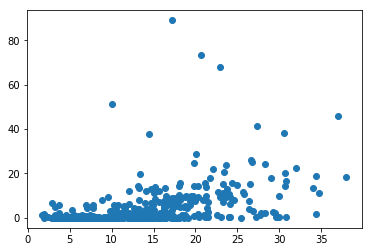

In [19]:
print('crime per capita and % lower status of the population')
plt.scatter(df.population_lower_status, df.crime_rate)
plt.show()

the suburbs of Boston appear to have particularly high crime rates, Tax rates, and Pupil-teacher ratios

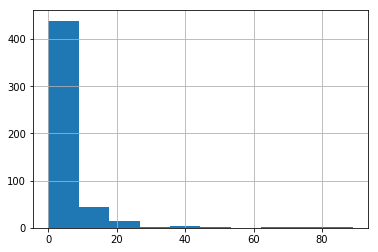

In [20]:
df.crime_rate.hist()

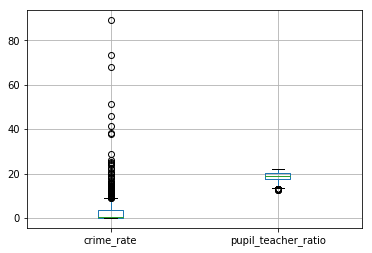

In [21]:
df[['crime_rate', 'pupil_teacher_ratio']].boxplot()
plt.show()

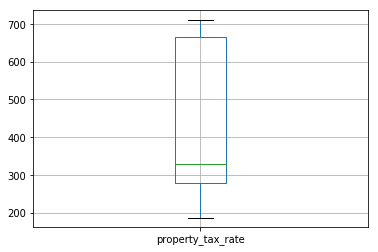

In [22]:
df[['property_tax_rate']].boxplot()

the number of suburbs in this data set bound the Charles river

In [23]:
df.suburbs_close_to_charles_river.value_counts()

0.0    471
1.0     35
Name: suburbs_close_to_charles_river, dtype: int64

median pupil-teacher ratio among the towns in this data set

In [24]:
df.pupil_teacher_ratio.median()

19.05

suburb of Boston has lowest median value of owneroccupied homes

In [25]:
BOSTON_NAMES['MEDV']

'owner_occupied_homes_value'

In [26]:
df

,crime_rate,residential_land_over_25000_sq_ft,non_retail_business,suburbs_close_to_charles_river,nitric_oxides_concentration,avg_number_of_rooms,owner_occupied_units_1940,distances_to_employment_centres,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,black_ethnicity,population_lower_status,owner_occupied_homes_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


average rooms per dwelling

In [27]:
round(df.avg_number_of_rooms).value_counts()

6.0    312
7.0    125
5.0     37
8.0     24
4.0      5
9.0      3
Name: avg_number_of_rooms, dtype: int64

the suburbs average more than seven rooms per dwelling

In [28]:
df[df.avg_number_of_rooms>7]

,crime_rate,residential_land_over_25000_sq_ft,non_retail_business,suburbs_close_to_charles_river,nitric_oxides_concentration,avg_number_of_rooms,owner_occupied_units_1940,distances_to_employment_centres,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,black_ethnicity,population_lower_status,owner_occupied_homes_value
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0.0,0.4280,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0.0,0.4030,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47428,0.0,18.10,1.0,0.7180,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
370,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
375,19.60910,0.0,18.10,0.0,0.6710,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0
453,8.24809,0.0,18.10,0.0,0.7130,7.393,99.3,2.4527,24.0,666.0,20.2,375.87,16.74,17.8


the suburbs average more than eight rooms per dwelling

In [29]:
df[df.avg_number_of_rooms>8]

,crime_rate,residential_land_over_25000_sq_ft,non_retail_business,suburbs_close_to_charles_river,nitric_oxides_concentration,avg_number_of_rooms,owner_occupied_units_1940,distances_to_employment_centres,accessibility_to_highways,property_tax_rate,pupil_teacher_ratio,black_ethnicity,population_lower_status,owner_occupied_homes_value
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0.0,0.5040,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0.0,0.5070,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0.0,0.5070,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
